<p><span style="font-size:.9em;">A Pytorch implementation of</span></p>
<p><span style="font-weight:bold;font-size:1.4em;">The Relativistic Discriminator: A Key Element Missing from Standard GAN  <a href='https://openreview.net/forum?id=S1erHoR5t7&noteId=S1erHoR5t7'><span style="font-size:0.9em;">Link to the Paper</span></a></span> </p>
<p><span style="font-size:1.2em;">Author: Alexia Jolicoeur-Martineau (Lady Davis Institute, Université de Montréal)</span> </p>
<p>Accepted at ICLR 2019</p>

<details><summary><span style="font-size:1.2em;">Paper Abstract</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span></summary>
<p>

In standard generative adversarial network (SGAN), the discriminator D estimates the probability that the input data is real. The generator G is trained to increase the probability that fake data is real. We argue that it should also simultaneously decrease the probability that real data is real because 1) this would account for a priori knowledge that half of the data in the mini-batch is fake, 2) this would be observed with divergence minimization, and 3) SGAN would be more similar to integral probability metric (IPM) GANs. <br> <br>
We show that this property can be induced by using a “relativistic discriminator” which estimate the probability that the given real data is more realistic than a randomly sampled fake data. We also present a variant in which the discriminator estimate the probability that the given real data is more realistic than fake data, on average. We generalize both approaches to non-standard GAN loss functions and we refer to them respectively as Relativistic GANs (RGANs) and Relativistic average GANs (RaGANs). We show that IPM-based GANs are a subset of RGANs which use the identity function. <br><br>
Empirically, we observe that 1) RGANs and RaGANs are significantly more stable and generate higher quality data samples than their non-relativistic counterparts, 2) Standard RaGAN with gradient penalty generate data of better quality than WGAN-GP while only requiring a single discriminator update per generator update (reducing the time taken for reaching the state-of-the-art by 400%), and 3) RaGANs are able to generate plausible high resolutions images (256x256) from a very small sample (N=2011), while GAN and LSGAN cannot; these images are of significantly better quality than the ones generated by WGAN-GP and SGAN with spectral normalization.

</p>
</details>

<span style="font-size:.9em;">The implementation is done by <br>A.Tarik Temur (Department of Computer Engineering, Middle East Technical University) and <br>M.Ekrem Odabas (Department of Computer Engineering, Middle East Technical University)</span>

## Summary of the Paper
<br>
<details><summary><span style="font-size:1.4em;">Summary of the Objectives and Motivations </span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span></summary>

<p>In the Standard GAN or SGAN (Goodfellow, 2014), as well as in many other GANs, the objective of the discriminator is to output the probability of an input example being real (sampled from the real distribution).</p>

$$D:\mathbb{P} \cup \mathbb{Q} \xrightarrow{} [0,1]$$

<p>And the loss function for the SGAN is the following: </p>

$$L_D = \mathbb{E}_{x_r \sim \mathbb{P}}[-log(D(x_r))] + \mathbb{E}_{x_f \sim \mathbb{P}_z}[-log(1 - D(G(x_f)))] $$

$$L_G = \mathbb{E}_{x_r \sim \mathbb{P}}[-log(1 - D(x_r))] + \mathbb{E}_{x_f \sim \mathbb{P}_z}[-log(D(G(x_f)))] $$

<p>Where $D$ is the discriminator, $G$ is the generator, $\mathbb{P}$ is the real distribution and $\mathbb{P}_z$ is some distribution from which random vectors are sampled (mostly gaussian). The goal of the model is to generate examples that the discriminator will mistakenly classify as real. </p>

<p>The main point of this paper is the following: SGAN is missing a key property: <span style="font-weight:bold"> it should be optimized to decrease $D(x_r)$ as well as increase $D(x_f)$ </span>.</p>

<p>A strong argument for this point is that we ignore prior knowledge by only increasing $D(x_f)$. We know that half of the images in the training set (or a batch) are real and the other half are fake. Based on this knowledge, the discriminator can not output high probabilities for all inputs. If real images are indistinguishable from fake ones, the probability of any given image being real should be 0.5. </p> 

<p>Another argument comes from the following property of the SGAN: The discriminator loss function $L_D$ of the SGAN is equal to the <a href='http://pages.stern.nyu.edu/~dbackus/BCZ/entropy/Jensen%96Shannon-divergence-Wikipedia.pdf'>Jensen-Shannon Divergence</a> between the real distribution and the generator distribution: </p>

$$JSD(\mathbb{P} || \mathbb{Q}) = \frac{1}{2} \left( \log(4) + \max_{D:X\xrightarrow[]{} [0,1]} \mathbb{E}_{x_r \sim \mathbb{P}}[log(D(x_r))] + \mathbb{E}_{x_f \sim \mathbb{Q}}[log(1 - D(x_f))]\right)$$

<p>Where $P$ is the real distribution and $\mathbb{Q}$ is the generator distribution. Notice that this function is minimized to a value of 0 when $D(x) = 0.5$ for all $x$. Therefore, it can be argued that for stable training, ideally, the discriminator outputs for fake examples should increase smoothly from 0 to 0.5 and the discriminator outputs for fake images should decrease smoothly from 1 to 0.5. The following figure provides a visualisation of this argument: </p>

![](https://i.imgur.com/j94An0X.png)

<p>Here, the graph on the right shows the direct minimization of JSD, the middle image shows the SGAN generator training and the image on the right shows the generator training scheme proposed in this paper. </p>


<p>A third argument is that <a href='https://arxiv.org/abs/0901.2698'>Integral Probability Metric</a> or IPM-Based GANs have been more recently shown to work much more stably and achieve better results (such as the WGAN or WGAN-GP). This is partly due to the fact that in IPM-Based GANs, both real and fake data contribute equally to the gradient of the discriminator loss function. In SGAN, on the other hand, when the discriminator reaches optimality, the gradient completely ignores real data. The formulation proposed to add the missing property to SGAN also adds this property to its gradients.</p>
</details>
    
<details><summary><span style="font-size:1.4em;">Propositions</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span></summary>
    
<span style="font-weight:bold;font-size:1.2em;">Relativistic Standard GAN (RSGAN)</span>
<p>The missing property is added in by changing the SGAN discriminator into the following: </p>

$$D(x_r, x_f) = \sigma(C(x_r) - C(x_f))$$

<p>where $C(x)$ is the critic, or the output of the discriminator right before it goes through the final sigmoid activation. So $C(x)$ outputs real values that should be positive for realistic images and negative for fake ones. This formulation changes the SGAN loss function into the following:  </p>

$$L_D = -\mathbb{E}_{(x_r, x_f) \sim (\mathbb{P},\mathbb{Q})}[log(\sigma(C(x_r) - C(x_f)))]$$

$$L_G = -\mathbb{E}_{(x_r, x_f) \sim (\mathbb{P},\mathbb{Q})}[log(\sigma(C(x_f) - C(x_r)))]$$

<p>The full derivation of these equations is omitted and can be found in the <a href='https://arxiv.org/pdf/1807.00734.pdf'>original paper</a> under Section 4.1. This modification can be interpreted in the following way: <span style="font-weight:bold">the discriminator estimates the probability
that the given real data is more realistic than a randomly sampled fake data.</span> Therefore, the model is optimized to increase $C(x_f)$ as well as decrease $C(x_r)$. </p>

<span style="font-weight:bold;font-size:1.2em;">Relativistic GAN</span>

<p>More generally, any discriminator defined as $a(C(x_r) - C(x_f))$ where $a$ is the activation function, is relativistic. And any GAN that employs a relativistic discriminator is called an RGAN. </p>

<p>For most GANs, the loss functions can be parameterized in the following way:  </p>

$$
    L_D = \mathbb{E}_{x_r \sim \mathbb{P}}[f_1(C(x_r))] +
    \mathbb{E}_{x_f \sim \mathbb{Q}}[f_2(C(x_f))]
$$

$$
        L_G = \mathbb{E}_{x_r \sim \mathbb{P}}[g_1(C(x_r))] +
    \mathbb{E}_{x_f \sim \mathbb{Q}}[g_2(C(x_f))]
$$

<p>where $f_1, f_2, g_1, g_2$ are scalar to scalar functions. When a relativistic discriminator is used, the loss functions takes the following form: </p>

$$
    L_D = \mathbb{E}_{(x_r, x_f) \sim (\mathbb{P},\mathbb{Q})}[f_1(C(x_r) - C(x_f))]
    + \mathbb{E}_{(x_r, x_f) \sim (\mathbb{P},\mathbb{Q})}[f_2(C(x_f) - C(x_r))]
$$


$$
    L_G = \mathbb{E}_{(x_r, x_f) \sim (\mathbb{P},\mathbb{Q})}[g_1(C(x_r) - C(x_f))]
    + \mathbb{E}_{(x_r, x_f) \sim (\mathbb{P},\mathbb{Q})}[g_2(C(x_f) - C(x_r))]
$$

<p>IPM-Based GANs represent a special class of RGANs where $f_1(y) = g_2(y) = -y$ and $f_2(y) = g_1(y) = y$. </p> 

<p>One important feature that most RGANs possess is that the $g_1$ term in the discriminator loss function has a nonzero gradient. For SGANs and most other GANs including the IPM-Based subclass of RGANs, this term only depends on real images and therefore has a 0 gradient with respect to the generator parameters. This means that in RGANs, \textbf{the generator is trained to minimize the full loss function envisioned rather than only half of it.}</p>

<span style="font-weight:bold;font-size:1.2em;">Relativistic Average GANs (RaGANs)</span>

<p>One possible issue with the RGAN in its current definition is that it uses a pair of images, one real and one fake, to compute its loss and, consequently, its gradients. And the discriminator is no longer measuring "the probability that input data is real", but "the probability that the input data is more realistic than a randomly sampled data of the opposing type". Therefore the computed losses may be unstable and may fail to represent the actual difference between the real and generated distributions (we might have a terrible real example matched with one of the best fakes). </p>

<p>In order to overcome this problem, the author introduces a modification to the RGAN to create a second class of RGANs, called the  Relativistic Average GANs (RaGANs). Here, the idea is to measure the difference between the output of the critic for a given image and, instead of just another image of the opposite type, the average of the critic outputs for all images (in a batch, practically) of the opposite type. \textbf{The discriminator estimates the probability that the given real data is more realistic than fake data, on average.} In other words, instead of looking at $C(x_r) - C(x_f)$ for a given pair $(x_r, x_f)$, we look at $C(x_r) - \mathbb{E}_{x_f \sim (\mathbb{Q})}(C(x_f))$. This results in the following loss functions: </p>

$$
    L_D = \mathbb{E}_{x_r \sim \mathbb{P}}[f_1(C(x_r) - \mathbb{E}_{x_f \sim \mathbb{Q}}[C(x_f)])] + \mathbb{E}_{x_f \sim \mathbb{Q}}[f_2(C(x_f) - \mathbb{E}_{x_r \sim \mathbb{P}}[C(x_r)])]
$$

$$
    L_G = \mathbb{E}_{x_r \sim \mathbb{P}}[g_1(C(x_r) - \mathbb{E}_{x_f \sim \mathbb{Q}}[C(x_f)])] + \mathbb{E}_{x_f \sim \mathbb{Q}}[g_2(C(x_f) - \mathbb{E}_{x_r \sim \mathbb{P}}[C(x_r)])]
$$

<p>One possible issue with this approach is that for each image, the average output for the opposite type needs to be calculated, increasing complexity from $\mathbb{O}(m)$ to $\mathbb{O}(m^2)$ where $m$ is the batch size. In practice however, the averages of the critic outputs for both real and fake images are calculated once per iteration (epoch) for each batch and the complexity remains linear in $m$.</p>
</details>

<br>
<br>

<details><summary><span style="font-size:1.5em;">Workflow of the Code</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span></summary>

Our implementation uses conditionals to create a generalized training function for relativistic, average relativistic and non-relativistic GANs with or without gradient penalty. Below is the pseudocode for the main training loop: <br><br>
$$
\begin{array}{l}
\begin{array}{l}
\textbf { Require:} \text{ The number of } D \text { iterations } n_{D}\text {, batch size } m, \text { gradient penalty coefficient } \lambda \text {, optimizer parameters } lr, \alpha, \beta_1, \beta_2    \text {, and functions } f_1, f_2, g_1 \text{ and } g_2 \text { which determine the objective functions of the generator and the discriminator according to the loss type.} \\
\hspace{1em}\textbf{while } \theta \text{ has not converged } \textbf{do}\\
\hspace{3em}\textbf{for } t=1,  \ldots, n_D \textbf{ do}\\
\hspace{5em}\text{Sample } x \sim \mathbb{P}\\
\hspace{5em}\text{Sample } z \sim \mathbb{P}_{z}\\
\hspace{5em}\tilde{x} = G_{\theta}\left(z\right)\\
\hspace{5em}\text{Add }  C_{w}\left(x\right) \text{ to } D_{parameters\thinspace1}\\
\hspace{5em}\text{Add }  C_{w}\left(\tilde{x}\right) \text{ to } D_{parameters\thinspace2}\\
\hspace{5em}\textbf{If} \text{ the loss type is relativistic average } \textbf{do} \\
\hspace{7em}C_{avg}  \left(x_{r}\right) = \frac{1}{m} C_{w}\left(x\right)\\
\hspace{7em}C_{avg}  \left(x_{f}\right) = \frac{1}{m} C_{w}\left(\tilde{x}\right)\\
\hspace{7em}\text{Add }  C_{avg}  \left(x_{f}\right)  \text{ to }  D_{parameters\thinspace1}\\
\hspace{7em}\text{Add }  C_{avg}  \left(x_{r}\right)  \text{ to }  D_{parameters\thinspace2}\\
\hspace{5em}\textbf{end if} \\
\hspace{5em}\textbf{If} \text{ the loss type has gradient penalty term }\textbf{do} \\
\hspace{7em}\text{Sample } \epsilon \sim U[0,1]  \text{ of size } (m,1) \\
\hspace{7em}\hat{x} = \epsilon x+(1-\epsilon) \tilde{x} \\
\hspace{7em}L_{GP} = \lambda\left(\left\|\nabla_{\hat{x}} D_{w}(\hat{x})\right\|_{2}-1\right)^{2} \\
\hspace{5em}\textbf{end if} \\
\hspace{5em}\text{Update } w \text{ using } Adam(\nabla_{w}\thinspace [\thinspace f_1\left(D_{parameters\thinspace1}\right)+f_2\thinspace(D_{parameters\thinspace2})], m, lr, \alpha, \beta_1, \beta_2, w) \\
\end{array} \\
\hspace{3em} \textbf { end for } \\
\hspace{3em}\tilde{x} = G_{\theta}\left(z\right)\\
\hspace{3em}\text{Add }  C_{w}\left(\tilde{x}\right) \text{ to } G_{parameters\thinspace2}\\
\hspace{3em}\textbf{If} \text{ the loss type is relativistic } \textbf{do} \\
\hspace{5em}\text{Sample } x \sim \mathbb{P}\\
\hspace{5em}\text{Add }  C_{w}\left(x\right) \text{ to } G_{parameters\thinspace1}\\
\hspace{3em}\textbf{end if} \\
\hspace{3em}\textbf{If} \text{ the loss type is relativistic average } \textbf{do} \\
\hspace{5em}C_{avg}  \left(x_{r}\right) = \frac{1}{m} C_{w}\left(x\right)\\
\hspace{5em}C_{avg}  \left(x_{f}\right) = \frac{1}{m} C_{w}\left(\tilde{x}\right)\\
\hspace{5em}\text{Add }  C_{avg}  \left(x_{f}\right)  \text{ to }  G_{parameters\thinspace1}\\
\hspace{5em}\text{Add }  C_{avg}  \left(x_{r}\right)  \text{ to }  G_{parameters\thinspace2}\\
\hspace{3em}\textbf{end if} \\
\hspace{3em}\text{Update } \theta \text{ using } Adam(\nabla_{\theta}[\thinspace g_1\left(G_{parameters\thinspace1}\right)+g_2\thinspace(G_{parameters\thinspace2})], m, lr, \alpha, \beta_1, \beta_2, \theta) \\
\hspace{1em}\textbf { end while }
\end{array}
$$
</details>

<br>

In [1]:
from IPython.display import Markdown as md, display
import numpy as np
from jupyter_utils import interaction, interaction_cat, read_results, create_markdown_cifar, create_markdown_cat,create_markdown_unstable, reproduce_cat_samples

In [2]:
cifar10_dict, cat_dict, unstable_dict = read_results()

## Experiment 5.1 CIFAR-10 (Table 1) <br>
<details>
    <summary>
        <span style="font-size:1.2em;">Model Architecture and Hyperparameters</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <br>
    Standard CNN architecture with spectral normalization (See Appendices, "I.1 Standard CNN" in the paper) is used.
    <br>
    <br>
    <table style='font-size:150%'>
        <tr>
            <th style="text-align: center; vertical-align: middle;">Generator</th>
            <th style="text-align: center; vertical-align: middle;">Discriminator</th>
        </tr>
        <tr>
            <td>
                <table>
                    <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $z \in \mathbb{R}^{128} \sim \mathcal{N}(0,I)$</span></th></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Fully Connected Layer, 128 → 512*4*4</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Reshape, 512*4*4 → (512, 4, 4)</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 512 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 256 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 128 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 3x3 kernel, stride 1, padding 1, channels 64 → 3</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Tanh</span></td></tr>
                </table>
            </td>
            <td>
                <table>
                    <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $x \in \mathbb{R}^{3x32x32}$</span></th></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 3 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 64 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 64 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 128 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 128 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 256 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 256 → 512</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Spectral Normalization</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Reshape, (512, 4, 4) → 512*4*4</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Fully Connected Layer, 512*4*4 → 1</span></td></tr>
                </table>
            </td>
        </tr> 
    </table>
    <br>
    The training is stopped after 100.000 generator updates. Adam optimizer and batch size of 64 is used. <br>
    The experiment involves training with two different settings of hyperparameters.<br>
    The hyperparameters of the first part are $lr$= .0002, Adam $\beta$ = (0.5,0.999) and the number of discriminator updates before a generator update ($n_D$) = 1. <br>
    The second part has $lr$= .0001, Adam $\beta$ = (0.5,0.9) and $n_D$ = 5. <br>
    Hyperparameters are stated also in the first row of the table.
</details>


<br>
FIDs are calculated at exactly 100k generator training iterations on CIFAR10 dataset. <br>
<br>

<details>
    <summary>
        <span style="font-size:1.2em;">Original Results from the Paper</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <table>
        <tr><td><span style="font-weight:normal">Loss Type</span></td><td>$lr$<span style="font-weight:normal">= .0002</span><br>$\beta$ <span style="font-weight:normal">= (0.5,0.999)</span><br>$n_D$ <span style="font-weight:normal">= 1</span></td><td>$lr$<span style="font-weight:normal">= .0001</span><br>$\beta$ <span style="font-weight:normal">= (0.5,0.9)</span><br>$n_D$ <span style="font-weight:normal">= 5</span></td></tr>
        <tr><td>SGAN</td><td>40.64</td><td>41.32</td></tr>
        <tr><td>RSGAN</td><td>36.61</td><td>55.29</td></tr>
        <tr><td>RaSGAN</td><td>31.98</td><td>37.92</td></tr>
        <tr><td>LSGAN</td><td>29.53</td><td>187.01</td></tr>
        <tr><td>RaLSGAN</td><td>30.92</td><td>219.39</td></tr>
        <tr><td>HingeGAN</td><td>49.53</td><td>80.85</td></tr>
        <tr><td>RaHingeGAN</td><td>39.12</td><td>37.72</td></tr>
        <tr><td>WGAN-GP</td><td>83.89</td><td><span style="font-weight:bold">27.81</span></td></tr>
        <tr><td>RSGAN-GP</td><td><span style="font-weight:bold">25.60</span></td><td>28.13</td></tr>
        <tr><td>RaSGAN-GP</td><td>331.86</td><td></td></tr>
    </table>
</details>



<br>

In [3]:
md(create_markdown_cifar(cifar10_dict))

|<span style="font-weight:normal">Loss Type</span>|$lr$<span style="font-weight:normal">= .0002</span><br>$\beta$ <span style="font-weight:normal">= (0.5,0.999)</span><br>$n_D$ <span style="font-weight:normal">= 1</span>|$lr$<span style="font-weight:normal">= .0001</span><br>$\beta$ <span style="font-weight:normal">= (0.5,0.9)</span><br>$n_D$ <span style="font-weight:normal">= 5</span>|
|:-:|:-:|:-:|
|SGAN|18.802|27.526|
|RSGAN|20.624|32.034|
|RaSGAN|18.345|28.406|
|LSGAN|23.444|42.789|
|RaLSGAN|22.728|37.017|
|HingeGAN|17.329|25.369|
|RaHingeGAN|19.079|28.864|
|WGAN-GP|75.000|25.687|
|RSGAN-GP|18.323|**17.500**|
|RaSGAN-GP|**14.908**||


## Experiment 5.2 CAT (Table 2) (Only 64x64 part) <br>
<details><summary><span style="font-size:1.2em;">Model Architecture and Hyperparameters</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span></summary>

<br>
DCGAN 64x64 architecture (See Appendices, "I.2. DCGAN 64x64" in the paper) is used.
<br>
<br>

<table style='font-size:150%'>
    <tr>
        <th><p style="text-align:center;">Generator</p></th>
        <th><p style="text-align:center;">Discriminator</p></th>  
    </tr>
    <tr>
        <td>   
            <table>
                <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $z \in \mathbb{R}^{128} \sim \mathcal{N}(0,I)$</span></th></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 1, padding 0, no bias, channels 128 → 512</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 512 → 256</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 256 → 128</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 128 → 64</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 64 → 3</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Tanh</span></td></tr>
            </table>
        </td>
        <td>  
            <table>
                <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $x \in \mathbb{R}^{3x64x64}$</span></th></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 3 → 64</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.2</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 64 → 128</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 128 → 256</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 256 → 512</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
                <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 512 → 1</span></td></tr>
            </table>
        </td>
    </tr>
</table>



<br>


<br>

The training is stopped after 100.000 generator updates. Adam optimizer and batch size of 64 is used. <br>
The hyperparameters of the experiment are $lr$= .0002, Adam $\beta$ = (0.5,0.999) and number of discriminator updates before generator update ($n_D$) = 1. <br>
Hyperparameters are stated also in the first row of the table.  <br>

</details>

<br>
FIDs are calculated at 20k, 30k, ..., 100k generator training iterations on the CAT 64x64 dataset. Minimum and maximum values, means, and standard deviations of the calculated FIDs are compared.  <br>
<br>
<details>
    <summary>
        <span style="font-size:1.2em;">Original Results from the Paper</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <table>
        <tr><td><span style="font-weight:normal">Loss Type</span></td><td><span style="font-weight:normal">Minimum FID</span></td><td><span style="font-weight:normal">Maximum FID</span></td><td><span style="font-weight:normal">Mean of FIDs</span></td><td><span style="font-weight:normal">StDev of FIDs</span></td></tr>
        <tr><td>SGAN</td><td>16.56</td><td>310.56</td><td>52.54</td><td>96.81</td></tr>
        <tr><td>RSGAN</td><td>19.03</td><td>42.05</td><td>32.16</td><td>7.01</td></tr>
        <tr><td>RaSGAN</td><td>15.38</td><td>33.11</td><td>20.53</td><td>5.68</td></tr>
        <tr><td>LSGAN</td><td>20.27</td><td>224.97</td><td>73.62</td><td>61.02</td></tr>
        <tr><td>RaLSGAN</td><td><span style="font-weight:bold">11.97</span></td><td><span style="font-weight:bold">19.29</span></td><td><span style="font-weight:bold">15.61</span></td><td>2.55</td></tr>
        <tr><td>HingeGAN</td><td>17.60</td><td>50.94</td><td>32.23</td><td>14.44</td></tr>
        <tr><td>RaHingeGAN</td><td>14.62</td><td>27.31</td><td>20.29</td><td>3.96</td></tr>
        <tr><td>RSGAN-GP</td><td>16.41</td><td>22.34</td><td>18.20</td><td>1.82</td></tr>
        <tr><td>RaSGAN-GP</td><td>17.32</td><td>22</td><td>19.58</td><td><span style="font-weight:bold">1.81</span></td></tr>
    </table>
</details>


<br>

<!-- <br>
DCGAN 64x64 architecture (See Appendices, "I.2. DCGAN 64x64" in the paper) is used.
<br>
<br>

<table style='font-size:150%'>
<tr><th><p style="text-align:center;">Generator</p>  </th><th><p style="text-align:center;">Discriminator</p>  </th></tr>

<tr>
<td>
<table>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $z \in \mathbb{R}^{128} \sim \mathcal{N}(0,I)$</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 1, padding 0, no bias, channels 128 → 512</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 512 → 256</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 256 → 128</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 128 → 64</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, no bias, channels 64 → 3</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Tanh</span></td></tr>
</table>
</td>
<td>
<table>

<tr><td style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $x \in \mathbb{R}^{3x64x64}$</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 3 → 64</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">LeakyReLU with negative slope 0.2</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 64 → 128</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 128 → 256</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 256 → 512</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.2</span></td></tr>
<tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, no bias, channels 512 → 1</span></td></tr>
</table>

</td>
</tr> 
</table>


<br>
<br>

The training is stopped after 100.000 generator updates. Adam optimizer and batch size of 64 is used. <br>
The hyperparameters of the experiment are $lr$= .0002, Adam $\beta$ = (0.5,0.999) and number of discriminator updates before generator update ($n_D$) = 1. <br>
Hyperparameters are stated also in the first row of the table.  <br> -->


In [4]:
md(create_markdown_cat(cat_dict))

|<span style="font-weight:normal">Loss Type</span>|<span style="font-weight:normal">Minimum FID</span>|<span style="font-weight:normal">Maximum FID</span>|<span style="font-weight:normal">Mean of FIDs</span>|<span style="font-weight:normal">StDev of FIDs</span>|
|:-:|:-:|:-:|:-:|:-:|
|SGAN|18.507|130.860|70.461|31.349|
|RSGAN|24.716|57.056|35.945|8.254|
|RaSGAN|21.624|36.994|28.792|4.833|
|LSGAN|16.050|100.984|36.745|25.665|
|RaLSGAN|**15.516**|**24.063**|**18.410**|2.628|
|HingeGAN|19.926|31.905|23.099|3.366|
|RaHingeGAN|18.207|51.322|32.380|8.862|
|RSGAN-GP|23.459|31.136|27.381|**2.279**|
|RaSGAN-GP|27.785|37.566|32.556|2.925|


## Experiment APPENDIX F CIFAR-10 HARD/UNSTABLE EXPERIMENTS (Table 4) <br>

<details>
    <summary>
        <span style="font-size:1.2em;">Model Architecture and Hyperparameters</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <br>
    Standard CNN architecture with batch normalization (See Appendices, "I.1 Standard CNN" in the paper) is used.
    <br>
    <br>
    <table style='font-size:150%'>
        <tr>
            <th style="text-align: center; vertical-align: middle;">Generator</th>
            <th style="text-align: center; vertical-align: middle;">Discriminator</th>
        </tr>
        <tr>
            <td>
                <table>
                    <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $z \in \mathbb{R}^{128} \sim \mathcal{N}(0,I)$</span></th></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Fully Connected Layer, 128 → 512\*4\*4</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Reshape, 512\*4\*4 → (512, 4, 4)</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 512 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 256 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 4x4 kernel, stride 2, padding 1, channels 128 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and ReLU</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">ConvTranspose2d, 3x3 kernel, stride 1, padding 1, channels 64 → 3</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Tanh</span></td></tr>
                </table>
            </td>
            <td>
                <table>
                    <tr><th style="text-align: center; vertical-align: middle;"><span style="font-weight:normal;font-size:1.2em;">Input $x \in \mathbb{R}^{3x32x32}$</span></th></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.2em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 3 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 64 → 64</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 64 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 128 → 128</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 128 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 4x4 kernel, stride 2, padding 1, channels 256 → 256</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Conv2d, 3x3 kernel, stride 1, padding 1, channels 256 → 512</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">BatchNorm and LeakyReLU with negative slope 0.1</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Reshape, (512, 4, 4) → 512\*4\*4</span></td></tr>
                    <tr><td style="text-align: center; vertical-align: middle;"><span style="font-size:1.3em;">Fully Connected Layer, 512\*4\*4 → 1</span></td></tr>
                </table>
            </td>
        </tr> 
    </table>
    <br>
    The training is stopped after 100.000 generator updates. Adam optimizer and batch size of 32 is used. <br>
    The default hyperparameters of the experiment are  $lr$ = .0002, Adam $\beta$ = (.50,.999), and the number of discriminator updates before a generator update ($n_D$) = 1. <br>
    The experiment has four parts where the model is re-trained after some changes in the hyperparameters. <br>
    In the first part, the learning rate is increased to 0.001,<br> 
    in the second part, Adam betas are changed to (0.9, 0.9),<br>
    in the third part, the batch normalization layers in the models are removed and
    in the fourth part, all activation functions except the final activation in the discriminator are changed to Tanh.
    The changes are stated also in the first row of the table.  <br>
</details>


<br>

FIDs are calculated at exactly 100k generator training iterations on CIFAR10 dataset. <br>

<br>
<details>
    <summary>
        <span style="font-size:1.2em;">Original Results from the Paper</span> <span style="font-size:.8em;"><em>(Click to Show/Hide)</em></span>
    </summary>
    <table>
        <tr><td><span style="font-weight:normal">Loss Type</span></td><td>$lr$<span style="font-weight:normal">= .001</span></td><td>$\beta$<span style="font-weight:normal">=(0.9,0.9)</span></td><td><span style="font-weight:normal">No BN</span></td><td><span style="font-weight:normal">Tanh Activations</span></td></tr>
        <tr><td>SGAN</td><td>154.20</td><td>35.29</td><td>35.54</td><td>59.17</td></tr>
        <tr><td>RSGAN</td><td>50.95</td><td>45.12</td><td>37.11</td><td>77.21</td></tr>
        <tr><td>RaSGAN</td><td>55.55</td><td>43.46</td><td>41.96</td><td>54.42</td></tr>
        <tr><td>LSGAN</td><td>52.27</td><td>225.94</td><td>38.54</td><td>147.87</td></tr>
        <tr><td>RaLSGAN</td><td><span style="font-weight:bold">33.33</span></td><td>48.92</td><td>34.66</td><td>53.07</td></tr>
        <tr><td>HingeGAN</td><td>43.28</td><td><span style="font-weight:bold">33.47</span></td><td><span style="font-weight:bold">34.21</span></td><td>58.51</td></tr>
        <tr><td>RaHingeGAN</td><td>51.05</td><td>42.78</td><td>43.75</td><td><span style="font-weight:bold">50.69</span></td></tr>
        <tr><td>WGAN-GP</td><td>61.97</td><td>104.95</td><td>85.27</td><td>59.94</td></tr>
    </table>
</details>

<br>

In [5]:
md(create_markdown_unstable(unstable_dict))

|<span style="font-weight:normal">Loss Type</span>|$lr$<span style="font-weight:normal">= .001</span>|$\beta$<span style="font-weight:normal">=(0.9,0.9)</span>|<span style="font-weight:normal">No BN</span>|<span style="font-weight:normal">Tanh Activations</span>|
|:-:|:-:|:-:|:-:|:-:|
|SGAN|154.114|**34.406**|30.409|96.037|
|RSGAN|48.271|54.405|**27.503**|97.019|
|RaSGAN|63.918|42.728|32.178|167.154|
|LSGAN|291.541|344.819|37.573|545.144|
|RaLSGAN|40.262|38.923|36.524|99.617|
|HingeGAN|150.263|497.832|80.740|157.708|
|RaHingeGAN|49.246|41.487|33.911|128.548|
|WGAN-GP|**32.096**|102.408|38.998|**43.624**|


<br><br><br>To reproduce the results, run the code cell below, set the options and click "Run Interact"

In [6]:
display(*interaction())

Text(value='Select experiments to reproduce and click "Run Interact" button', disabled=True, layout=Layout(wid…

interactive(children=(ToggleButtons(description='Experiment:', layout=Layout(width='auto'), options=(('Cifar 1…

## Qualitative Experiment: Figure 3 of the paper
Samples from the model with the lowest FID (RaLSGAN at 70k generator iterations with 15.516 FID) <br>
Generate new samples by clicking the "Run Interact" button after running the code cell "display(*interaction_cat())".

Loading the model...
Generating samples...


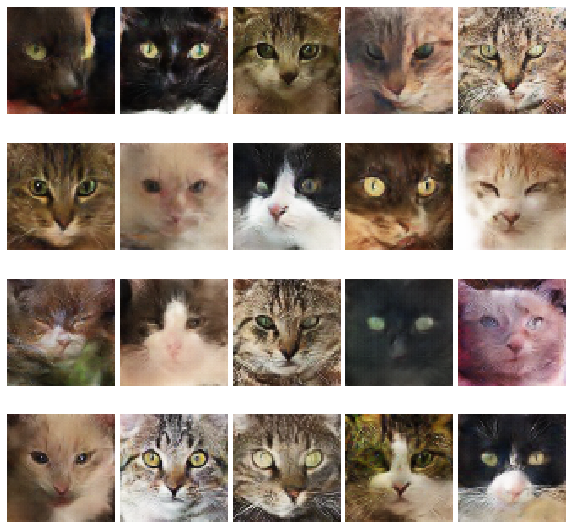

In [7]:
reproduce_cat_samples(4,5,False)

In [8]:
display(*interaction_cat())

Text(value='Select options and click "Run Interact" button to reproduce cat samples', disabled=True, layout=La…

interactive(children=(BoundedIntText(value=4, description='Rows:', max=20, min=1), BoundedIntText(value=5, des…

### Difficulties Encountered

Batch sizes used for training were not stated in the paper which forced us to assume them. We used a batch size of 64 for experiments 5.1 and 5.2 and 32 for the experiment in Appendix F. <br>

An issue with FID scores: 

    Our paper required that we evaluate our models using FID scores. We needed a pretrained InceptionV3 model to calculate the FID scores,
    however, in order to reproduce the results listed in the paper, we would need the same InceptionV3 model as the one used in the paper. 
    Otherwise we would have some differences in weights which would cause differences in FID scores. After some research, we realized that 
    the most mainstream InceptionV3 model for FID score calculation is a TensorFlow implementation which accompanied the original FID paper
    "GANs Trained by a Two Time-Scale Update Rule Converge to a Local Nash Equilibrium" 
    (this implementation can be found here: https://github.com/bioinf-jku/TTUR).

    The only PyTorch implementation with wide use seems to be one due to mseitzer which can be found here: 
    https://github.com/mseitzer/pytorch-fid. The issue with this implementation is that, the author has provided the following disclaoimer in
    the readme file: 
     "Note that the official implementation gives slightly different scores. If you report FID scores in your paper, and you want 
    them to be exactly comparable to FID scores reported in other papers, you should use the official Tensorflow implementation."
 
    As seen here and in virtually any other resource available on FID scores, the recommended course of action is to use the oficial implementation
    (or the preloaded InceptionV3 model from the official implementation). However, since the official implementation is in TensorFlow, and 
    since we're expected to implement our metrics ourselves within the scope of this course, we decided to use our own implementation 
    of the FID score calculator. 

    The InceptionV3 model in our implementation is preloaded from torchvision.models with its last layer removed to output activations. We should
    note that our results did not stray too far from those reported in the paper though we do report some differences and partly attribute them
    to the differences in InceptionV3 weights between the two papers. 

    As a clarification, our implementation of the FID scoring algorithm follows the methods explored in the original FID paper but it's
    implementation is completely our work.
<br>

Gradient penalty coefficient parameter was not stated in the paper. We used the WGAN-GP default 10.<br>
<br>
